# Les conditions : des actions différentes en fonction des entrées

Nous avons vu rapidement qu'il était possible de tester les valeurs des puissances de la PAC pour en extraire le taux de fonctionnement. Nous allons apprendre plus en détail comment fonctionnent *les structures conditionnelles* pour écrire un code qui execute différentes instructions en fonction de nos entrées.

## Les conditions

Il est possible d'executer différentes actions, selon une condition, avec le statement `if`.

In [ ]:
num = 102
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')


On test une condition avec `if` : si elle est respecté, le code du bloc suivant est executé. Dans le cas contraire, le bloc suivant le statement `else` sera executé. Une fois revenu au niveau d'indentation précédent, le code continue normalement. **Seul l'un des deux blocs est executé**.

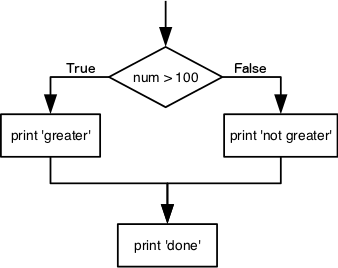

Le statement `else` n'est pas obligatoire. Dans le cas ou il est omit et que la condition n'est pas respecté, Python passera juste à la suite.

In [ ]:
num = 102
print('before conditional...')
if num > 100:
    print(num,' is greater than 100')
print('...after conditional')

Il est aussi possible d'enchainer les tests avec `elif` (pour "else if").

In [ ]:
num = -3

if num > 0:
    print(num, 'is positive')
    print(num, 'is zero')
else:
    if num == 0:
        print(num, 'is zero')
    else:
        if....
    print(num, 'is negative')


In [ ]:
num = -3

if num > 0:
    print(num, 'is positive')
elif num == 0:
    print(num, 'is zero')
else:
    print(num, 'is negative')


**Attention à `==`, à ne pas confondre avec `=`.** Le premier teste une égalité entre deux valeurs, le second sert à assigner une valeur à une variable.

Il est possible de combiner les conditions avec `and` et `or`.

In [ ]:
if (1 > 0) and (-1 > 0):
    print('both parts are true')
else:
    print('at least one part is false')


In [ ]:
if (1 < 0) or (-1 < 0):
    print('at least one test is true')


In [ ]:
first_cond = (1 < 0) # False
second_cond = (-1 < 0) # True

In [ ]:
print(first_cond and second_cond)
print(first_cond or second_cond)

### `True` et `False`

Ce sont des mots reservé en Python appelés *booléens* et qui représentent une valeur de vérité. Ce sont ces valeurs qui sont retournés par une condition (comme `0 < 1`).

Chaques types peuvent être convertis en booléens avec la fonction `bool`.

In [ ]:
print(bool(""), bool("fez"))
print(bool(0), bool(5))
print(bool(0.), bool(-0.9))
print(bool([]), bool([0]))
print(bool({}), bool({"key": []}))

A noter qu'il n'est pas utile de tester un booléen :

In [ ]:
first_cond = (1 < 0)

In [ ]:
if first_cond == True:
    print("condition True")

et

In [ ]:
if first_cond:
    print("condition True")

sont strictement identiques.

In [ ]:
# not => inversion
print(not True)
print(not False)

In [ ]:
# vérifier identité
a = b = [3, 2, 5]
print(a is b) # id(a) == id(b)

a = [3, 2, 5]
b = list(a)
print(a is b)

In [ ]:
# vérifier tous éléments identiques
a = b = [3, 2, 5]
print(a == b)

a = [3, 2, 5]
b = list(a)
print(a == b)

In [ ]:
print(8 in [8, 7, 'a'])

print(8 in [6, 7, 'a'])

## Exercice : application à nos données.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Nous allons importer des données provenant d'un capteur de CO2 échantillonées toutes les 10 minute.

In [ ]:
data = np.loadtxt("../../data/CO2_np.csv", delimiter=",")

In [ ]:
data.shape

In [ ]:
days, minutes = map(np.arange, data.shape) # map prend une fonction et un itérable et va appliquer la fonction à chaque éléments de l'itérable
hours = minutes / 60

Ces données ont plusieurs problèmes :

- Le capteur sature à une certaine valeur de CO2.
- Il possède une valeur minimale et n'est pas capable de traiter les valeurs qui sont inférieurs.

In [ ]:
plt.pcolormesh(hours, days, data)

Quels est, pour chaque jour, la proportion de données en saturation haute (valeur de saturation) et en saturation basse?

In [ ]:
# On récupère les valeurs min et max qui correspondent à la saturation du capteur.
low_sat = data.min() 
high_sat = data.max()

In [ ]:
%%time 
# Pour le moment, on va se contenter de faire deux boucles imbriqué.
# c'est une "mauvaise pratique" mais qui permettra de manipuler les booléens.
for i, daily_data in enumerate(data, 1): # enumerate permet de récupérer l'index en plus de l'éléments d'un itérable.
    # pour chaques jours, on initialise un compteur
    count = 0
    for value in daily_data:
        # pour chaque minutes de la journée, on teste si la valeur sature,
        # en étant égale ou sup. (resp. inf.) à la valeur de saturation haute (resp. basse).
        if (value >= high_sat) or (value <= low_sat):
            # Si c'est vrai, on incrémente le compteur
            count = count + 1
    print(f"Perc. of sat., day {i:02d}: {count / len(daily_data) * 100:.1f} %")

Comme indiqué dans [la documentation numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/ufuncs.html#comparison-functions), il ne faut pas utiliser `and` ou `or` pour combiner des booléens de deux array éléments par éléments. On utilisera les opérateurs `&` à la place du `and` et `|` à la place du `or`. On peut aussi utiliser `~` comme équivalent éléments-par éléments de `not`, ce qui inversera un tableau de booléens (True -> False et False -> True).

> Do not use the Python keywords and and or to combine logical array expressions. These keywords will test the truth value of the entire array (not element-by-element as you might expect). Use the bitwise operators & and | instead.

De plus, attention à la précédence !

> `(a > 2) & (a < 5)` is the proper syntax because `a > 2 & a < 5` will result in an error due to the fact that `2 & a` is evaluated first.

Une fois que cette information est connu, il est possible de vectoriser notre code.

In [ ]:
%%time 
is_saturated = (data <= low_sat) | (data >= high_sat) # On crée un array de "flag" qui indique les données saturés
# Comme int(False) == 0, on peut compter les éléments non-nuls avec `np.count_nonzero` pour connaitre les éléments nonsaturés.
saturated_count = np.count_nonzero(is_saturated, axis=1)
frac_saturated_daily = saturated_count / data.shape[1]

for i, fract_sat in enumerate(frac_saturated_daily, 1):
    print(f"Perc. of sat., day {i:02d}: {fract_sat * 100:.1f} %")
